Problem Statement: The Goal is to predict whether a person has an income of more than 50K a year or not. This is basically a binary classification problem where a person is classified into the >50K group or <=50K group.

Approach: The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

Dataset Link: https://www.kaggle.com/datasets/overload10/adult-census-dataset/data

Features description:

#### age: continuous.
#### workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
#### fnlwgt: continuous.
#### education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
#### education-num: continuous.
#### marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
#### occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
#### relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
#### race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
#### sex: Female, Male.
#### capital-gain: continuous.
#### capital-loss: continuous.
#### hours-per-week: continuous.
#### native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
## Data Ingestions step
data=pd.read_csv('data/adult.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.shape

(32561, 15)

In [6]:
# Check null values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [7]:
# check duplicate value in data set
data.duplicated().sum()

24

In [8]:
# drop duplicate value from data
data.drop_duplicates(inplace=True)


In [9]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
## segregate numerical and categorical columns

numerical_columns=data.columns[data.dtypes!='object']
categorical_columns=data.columns[data.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Categorical Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country', 'salary'],
      dtype='object')


In [11]:
# fetching the unique values from categorical columns
for i in categorical_columns:
    print(i,data[i].unique())
    print("*"*80)

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
********************************************************************************
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
********************************************************************************
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
********************************************************************************
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
*****************

In [12]:
#Verifying the number of label categories in salary feature
salary_feature = data['salary'].value_counts(normalize=True)
round(salary_feature * 100, 2).astype('str') + ' %'

salary
 <=50K    75.91 %
 >50K     24.09 %
Name: proportion, dtype: object

In [13]:
# remove empty values and replace with mode value
data["workclass"] = data["workclass"].replace(" ?"," Private")
data["occupation"] = data["occupation"].replace(" ?"," Prof-specialty")
data["country"] = data["country"].replace(" ?"," United-States")

In [14]:
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

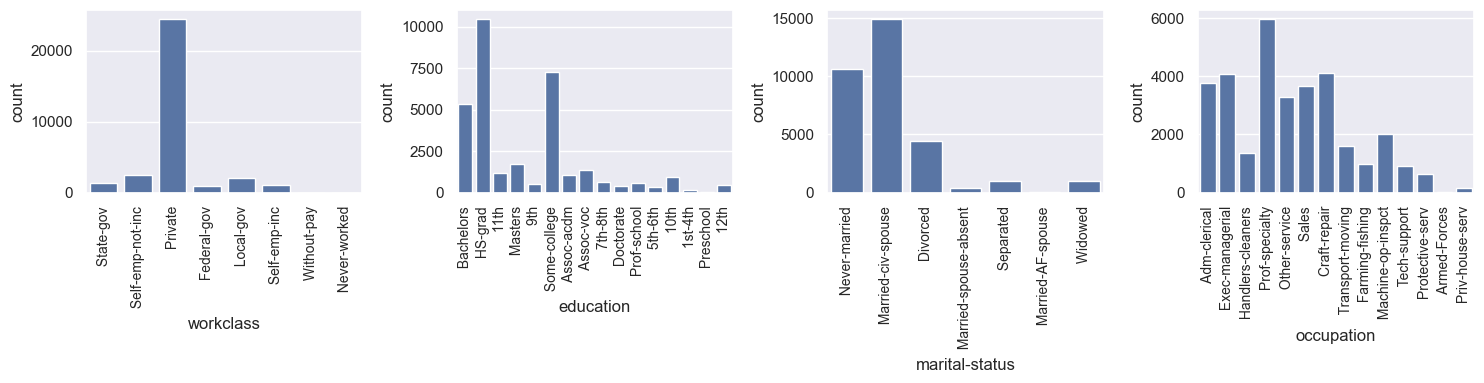

In [15]:
cato1 = ['workclass', 'education', 'marital-status', 'occupation']
try:
    for i in range(0,len(cato1)):
        plt.subplot(2,4,i+1)
        sns.countplot(x=data[cato1[i]])
        plt.xticks(size=10,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)


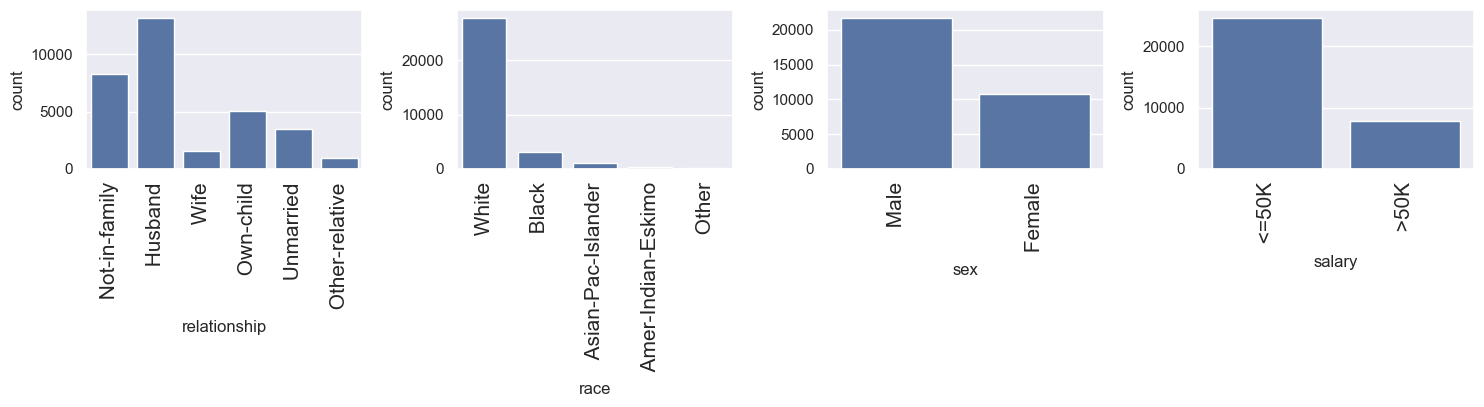

In [16]:
cato2 = ['relationship', 'race', 'sex', 'salary']
try:
    for i in range(0,len(cato2)):
        plt.subplot(2,4,i+1)
        sns.countplot(x=data[cato2[i]])
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)


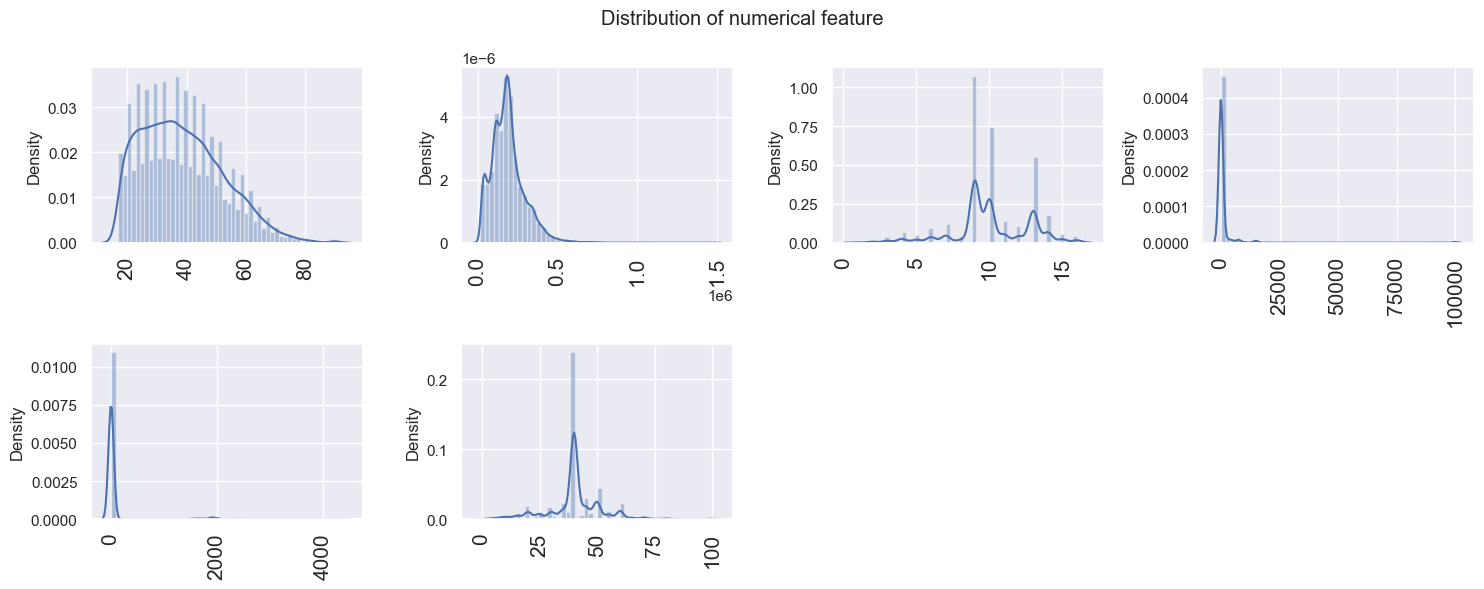

In [17]:
try:
    plt.suptitle("Distribution of numerical feature")
    for i in range(0,len(numerical_columns)):
        plt.subplot(2,4,i+1)
        sns.distplot(x=data[numerical_columns[i]])
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)

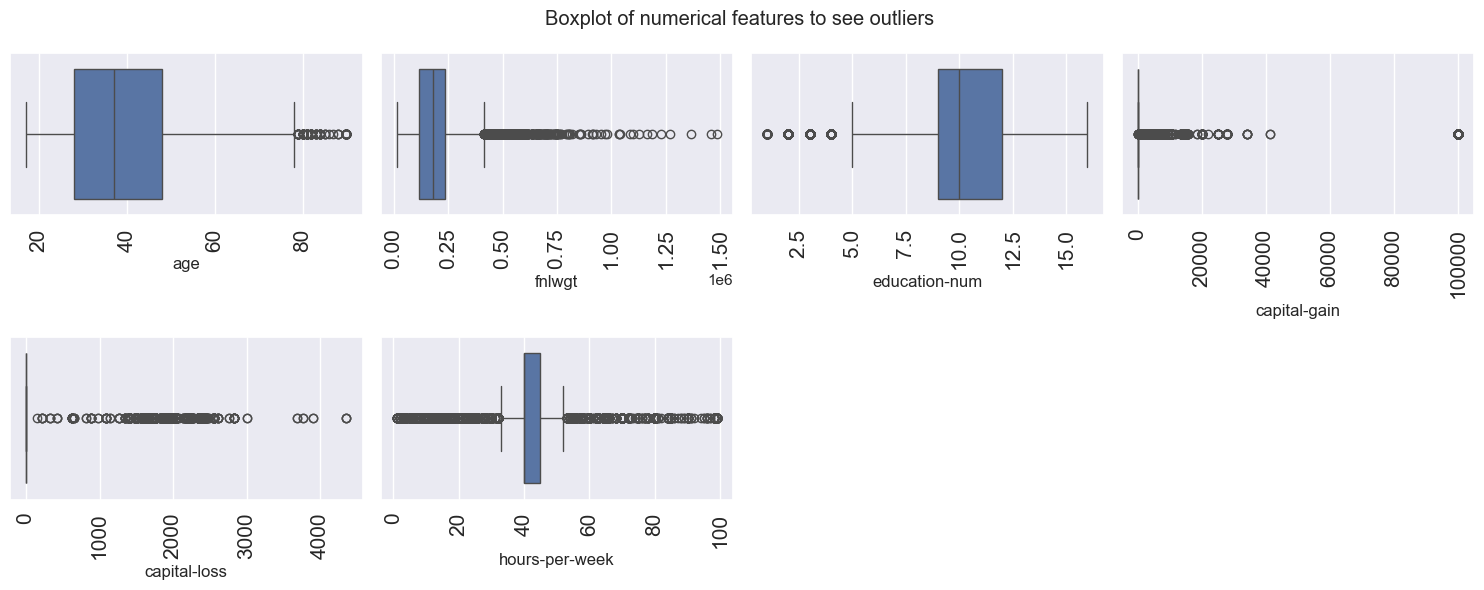

In [18]:
try:
    plt.suptitle("Boxplot of numerical features to see outliers ")
    for i in range(0,len(numerical_columns)):
        plt.subplot(2,4,i+1)
        sns.boxplot(x=data[numerical_columns[i]])
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)

<Axes: xlabel='salary'>

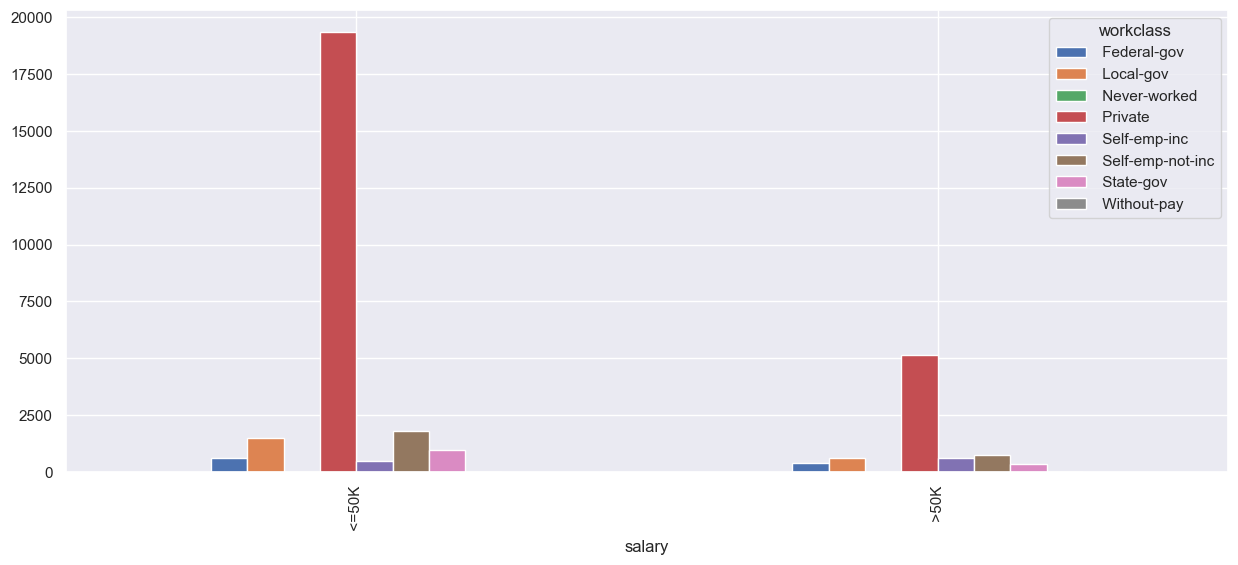

In [19]:
class_salary = pd.crosstab(data['salary'],data['workclass'])
class_salary.plot(kind='bar')

<Axes: xlabel='salary'>

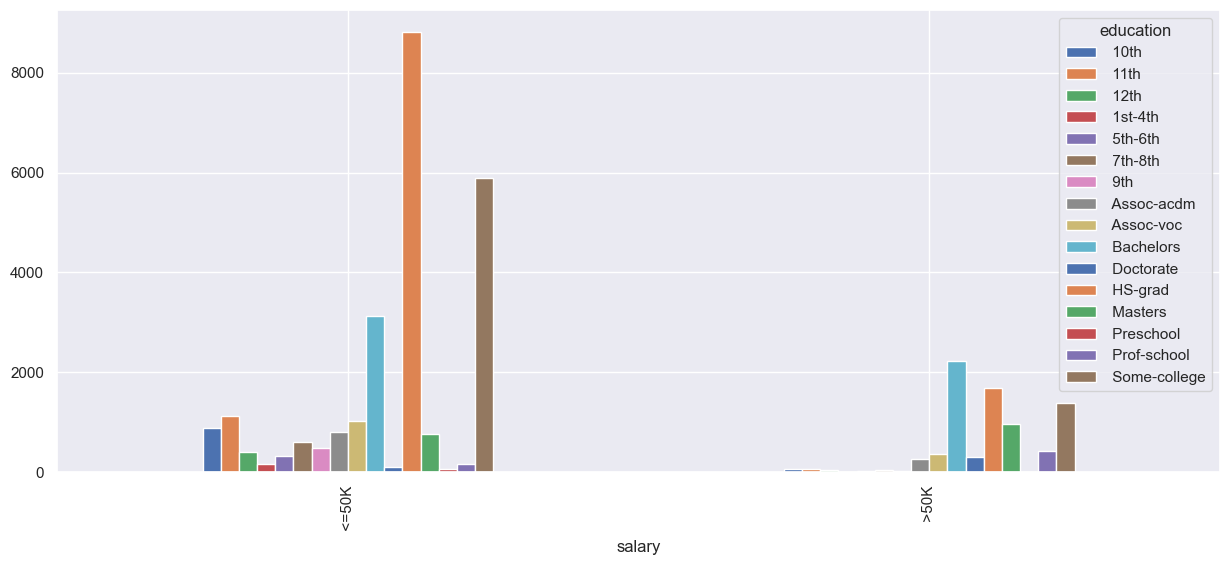

In [20]:
education = pd.crosstab(data['salary'],data['education'])
education.plot(kind="bar")

<Axes: xlabel='salary'>

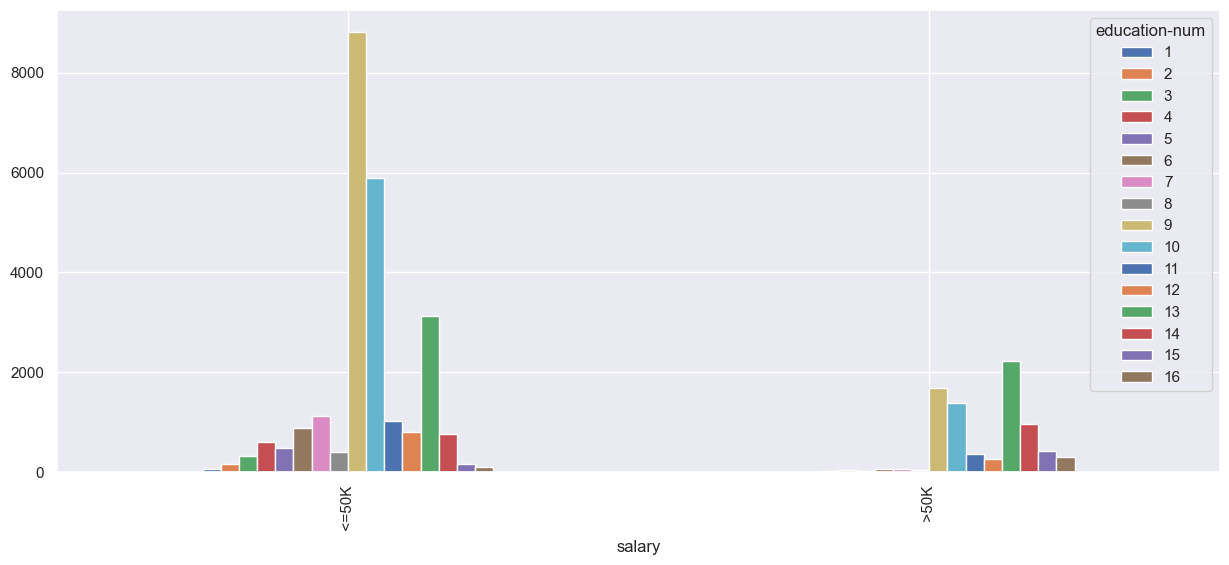

In [21]:
education_num = pd.crosstab(data['salary'],data['education-num'])
education_num.plot(kind="bar")

<Axes: xlabel='salary'>

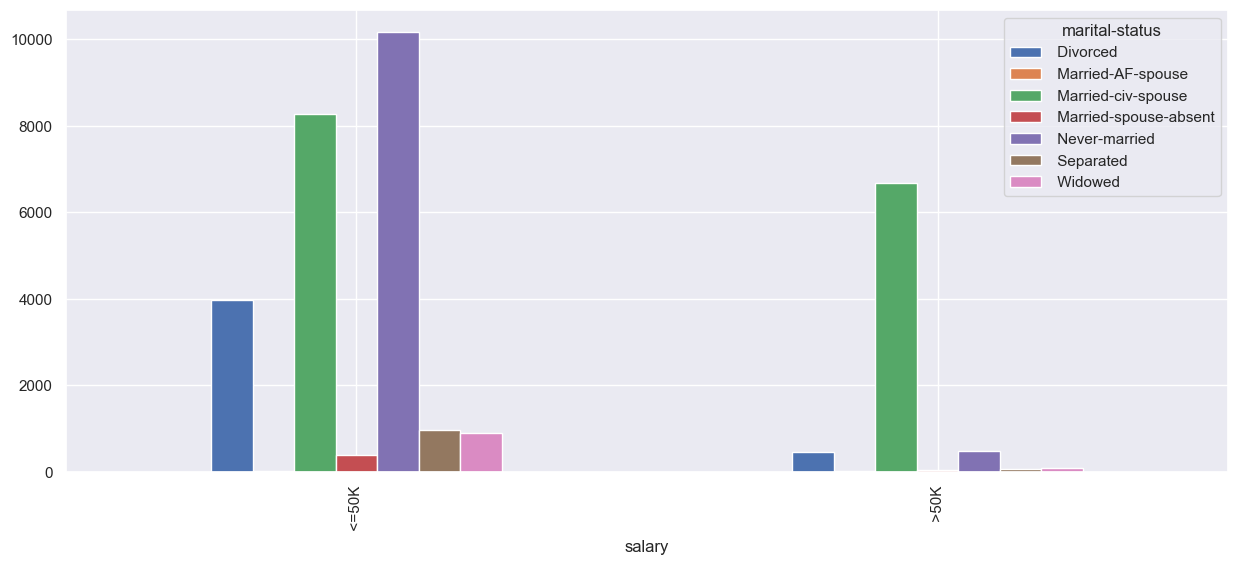

In [22]:
marital_status = pd.crosstab(data['salary'],data['marital-status'])
marital_status.plot(kind="bar")

<Axes: xlabel='salary'>

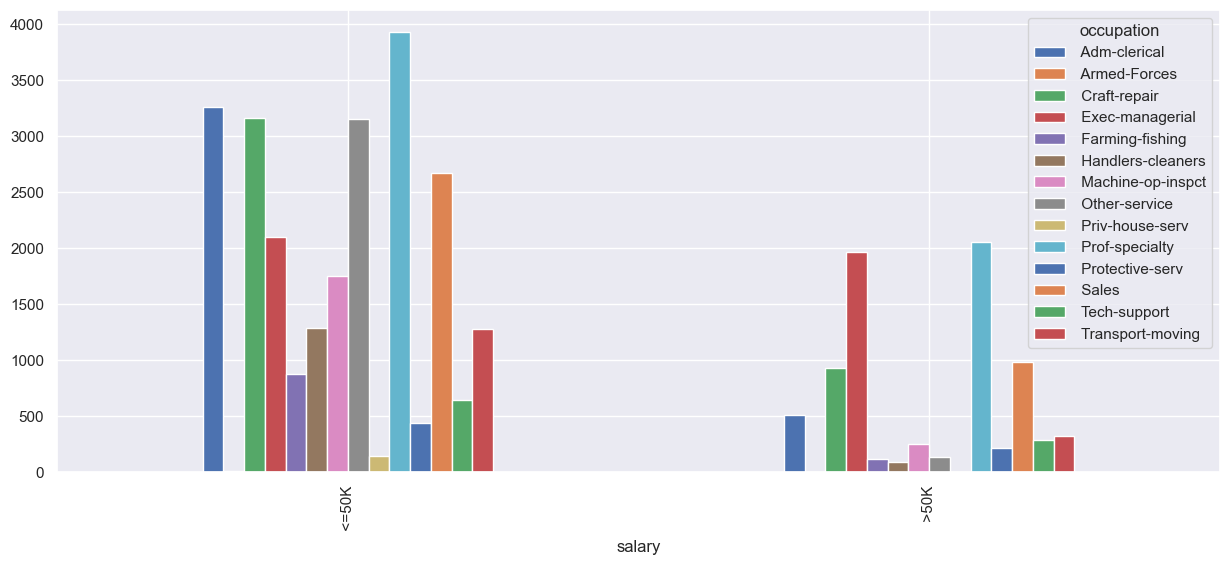

In [23]:
occupation = pd.crosstab(data['salary'],data['occupation'])
occupation.plot(kind="bar")

<Axes: xlabel='salary'>

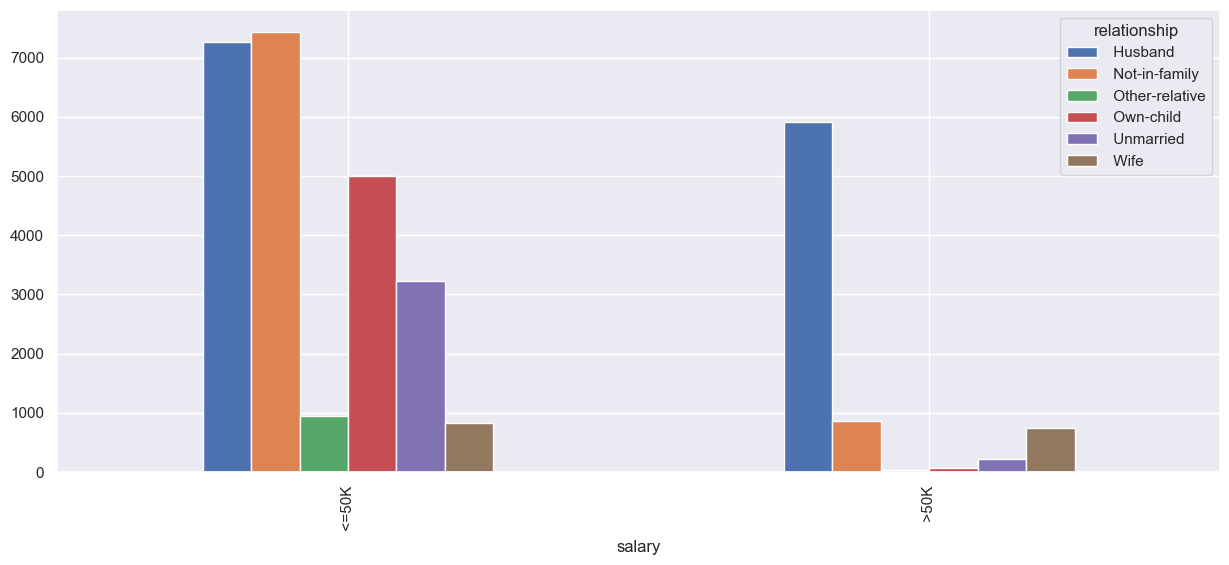

In [24]:
relationship = pd.crosstab(data['salary'],data['relationship'])
relationship.plot(kind="bar")

<Axes: xlabel='salary'>

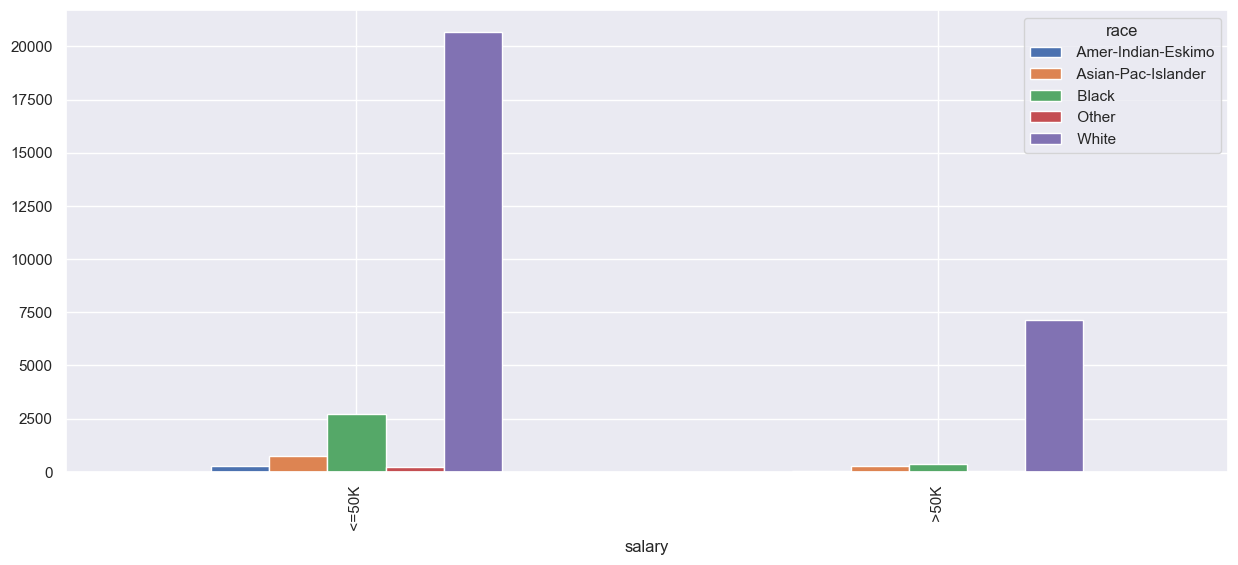

In [25]:
race = pd.crosstab(data['salary'],data['race'])
race.plot(kind="bar")

In [26]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_features =['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country']

# loop through the categorical features and encode them
for feature in categorical_features:
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])

In [27]:
data["salary"] = data["salary"].map({' <=50K':0, ' >50K':1})

In [28]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [31]:
data.rename(columns={'education-num': 'education_num', 'marital-status': 'marital_status' , 'capital-gain': 'capital_gain', 'capital-loss': 'capital_loss', 'hours-per-week':'hours_per_week','country':'native_country','salary':'income'})

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [35]:
data.to_csv("adult_cleandata.csv",index=False)